descargar html

In [3]:
import requests
from bs4 import BeautifulSoup


url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Agrega un encabezado User-Agent
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36",
    "Referer": "https://www.macrotrends.net"
}

# Realiza la solicitud con los encabezados
response = requests.get(url, headers=headers)

# Verifica si la solicitud fue exitosa
if response.status_code == 200:
    html_data = response.text
html_data

'\r\n<!DOCTYPE html>\r\n<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\r\n<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->\r\n<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->\r\n<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->\r\n    <head>\r\n        <meta charset="utf-8">\r\n        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\r\n\t\t<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />\r\n\t\t<title>Tesla Revenue 2010-2024 | TSLA | MacroTrends</title>\r\n\t\t<link rel="icon" type="image/x-icon" href="/assets/images/icons/FAVICON/macrotrends-favicon.ico">\r\n\t\t<meta name="description" content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2024. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement

Transformar el HTML

In [2]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")
soup



<!DOCTYPE html>

<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
<title>Tesla Revenue 2010-2024 | TSLA | MacroTrends</title>
<link href="/assets/images/icons/FAVICON/macrotrends-favicon.ico" rel="icon" type="image/x-icon"/>
<meta content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2024. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&

In [4]:
# Encuentra todas las tablas en el HTML
tables = soup.find_all("table")
tables

[<table class="historical_data_table table">
 <thead>
 <tr>
 <th colspan="2" style="text-align:center">Tesla Annual Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
 </tr>
 </thead>
 <tbody>
 <tr>
 <td style="text-align:center">2023</td>
 <td style="text-align:center">$96,773</td>
 </tr>
 <tr>
 <td style="text-align:center">2022</td>
 <td style="text-align:center">$81,462</td>
 </tr>
 <tr>
 <td style="text-align:center">2021</td>
 <td style="text-align:center">$53,823</td>
 </tr>
 <tr>
 <td style="text-align:center">2020</td>
 <td style="text-align:center">$31,536</td>
 </tr>
 <tr>
 <td style="text-align:center">2019</td>
 <td style="text-align:center">$24,578</td>
 </tr>
 <tr>
 <td style="text-align:center">2018</td>
 <td style="text-align:center">$21,461</td>
 </tr>
 <tr>
 <td style="text-align:center">2017</td>
 <td style="text-align:center">$11,759</td>
 </tr>
 <tr>
 <td style="text-align:center">2016</td>
 <td style="text-align:center">$7,000</td>
 </tr>
 <

In [6]:
import pandas as pd
if tables:
        # Identifica la tabla de "Tesla Quarterly Revenue"
    table_index = 1  # Asume que la tabla de interés es la segunda (índice 1)
    tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
    for row in tables[table_index].find_all("tr"):
        col = row.find_all("td")
        if len(col) >= 2:  # Verifica que haya al menos dos columnas
            Date = col[0].text.strip()
            Revenue = col[1].text.replace("$", "").replace(",", "").strip()
            new_row = pd.DataFrame({"Date": [Date], "Revenue": [Revenue]})
            tesla_revenue = pd.concat([tesla_revenue, new_row], ignore_index=True)
        
    if not tesla_revenue.empty:
            # Convierte la columna 'Date' a formato datetime
        try:
            tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])
            print("Datos extraídos:")
            print(tesla_revenue)
        except Exception as e:
            print(f"Error al convertir las fechas: {e}")
        else:
            print("No se encontraron datos válidos en las tablas.")
    else:
        print("No se encontraron tablas en el HTML. Revisa la estructura del HTML.")
else:
    print(f"No se pudo acceder al sitio web. Código de estado: {response.status_code}")


Datos extraídos:
         Date Revenue
0  2024-03-31   21301
1  2023-12-31   25167
2  2023-09-30   23350
3  2023-06-30   24927
4  2023-03-31   23329
5  2022-12-31   24318
6  2022-09-30   21454
7  2022-06-30   16934
8  2022-03-31   18756
9  2021-12-31   17719
10 2021-09-30   13757
11 2021-06-30   11958
12 2021-03-31   10389
13 2020-12-31   10744
14 2020-09-30    8771
15 2020-06-30    6036
16 2020-03-31    5985
17 2019-12-31    7384
18 2019-09-30    6303
19 2019-06-30    6350
20 2019-03-31    4541
21 2018-12-31    7226
22 2018-09-30    6824
23 2018-06-30    4002
24 2018-03-31    3409
25 2017-12-31    3288
26 2017-09-30    2985
27 2017-06-30    2790
28 2017-03-31    2696
29 2016-12-31    2285
30 2016-09-30    2298
31 2016-06-30    1270
32 2016-03-31    1147
33 2015-12-31    1214
34 2015-09-30     937
35 2015-06-30     955
36 2015-03-31     940
37 2014-12-31     957
38 2014-09-30     852
39 2014-06-30     769
40 2014-03-31     621
41 2013-12-31     615
42 2013-09-30     431
43 2013-06-30  

procesar los datos

In [7]:
tesla= tesla_revenue[tesla_revenue["Revenue"] != ""]
tesla_revenue.head()

,Date,Revenue
0,2024-03-31,21301
1,2023-12-31,25167
2,2023-09-30,23350
3,2023-06-30,24927
4,2023-03-31,23329


ALMAECENAR EN SQLITE

In [8]:
import sqlite3

connection = sqlite3.connect("Tesla.db")
connection

In [15]:
tesla_tuples = list(tesla_revenue.to_records(index = False))
tesla_tuples[:5]

[np.record(('2024-03-31T00:00:00.000000000', '21301'), dtype=[('Date', '<M8[ns]'), ('Revenue', 'O')]),
 np.record(('2023-12-31T00:00:00.000000000', '25167'), dtype=[('Date', '<M8[ns]'), ('Revenue', 'O')]),
 np.record(('2023-09-30T00:00:00.000000000', '23350'), dtype=[('Date', '<M8[ns]'), ('Revenue', 'O')]),
 np.record(('2023-06-30T00:00:00.000000000', '24927'), dtype=[('Date', '<M8[ns]'), ('Revenue', 'O')]),
 np.record(('2023-03-31T00:00:00.000000000', '23329'), dtype=[('Date', '<M8[ns]'), ('Revenue', 'O')])]

In [16]:
cursor.executemany("INSERT INTO revenue VALUES (?,?)", tesla_tuples)
connection.commit()


In [17]:
for row in cursor.execute("SELECT * FROM revenue"):
    print(row)

(b'\x00\x00+\x17R\xb0\xc1\x17', '21301')
(b'\x00\x00\x16p\x82\xc1\xa5\x17', '25167')
(b'\x00\x00\xb27\x1e\x84\x89\x17', '23350')
(b'\x00\x00N\xff\xb9Fm\x17', '24927')
(b'\x00\x009X\xeaWQ\x17', '23329')
(b'\x00\x00sB\xaf\xb75\x17', '24318')
(b'\x00\x00\x0f\nKz\x19\x17', '21454')
(b'\x00\x00\xab\xd1\xe6<\xfd\x16', '16934')
(b'\x00\x00\x96*\x17N\xe1\x16', '18756')
(b'\x00\x00\xd0\x14\xdc\xad\xc5\x16', '17719')
(b'\x00\x00l\xdcwp\xa9\x16', '13757')
(b'\x00\x00\x08\xa4\x133\x8d\x16', '11958')
(b'\x00\x00\xf3\xfcCDq\x16', '10389')
(b'\x00\x00-\xe7\x08\xa4U\x16', '10744')
(b'\x00\x00\xc9\xae\xa4f9\x16', '8771')
(b'\x00\x00ev@)\x1d\x16', '6036')
(b'\x00\x00P\xcfp:\x01\x16', '5985')
(b'\x00\x00;(\xa1K\xe5\x15', '7384')
(b'\x00\x00\xd7\xef<\x0e\xc9\x15', '6303')
(b'\x00\x00s\xb7\xd8\xd0\xac\x15', '6350')
(b'\x00\x00^\x10\t\xe2\x90\x15', '4541')
(b'\x00\x00\x98\xfa\xcdAu\x15', '7226')
(b'\x00\x004\xc2i\x04Y\x15', '6824')
(b'\x00\x00\xd0\x89\x05\xc7<\x15', '4002')
(b'\x00\x00\xbb\xe25\xd8 \x15', '

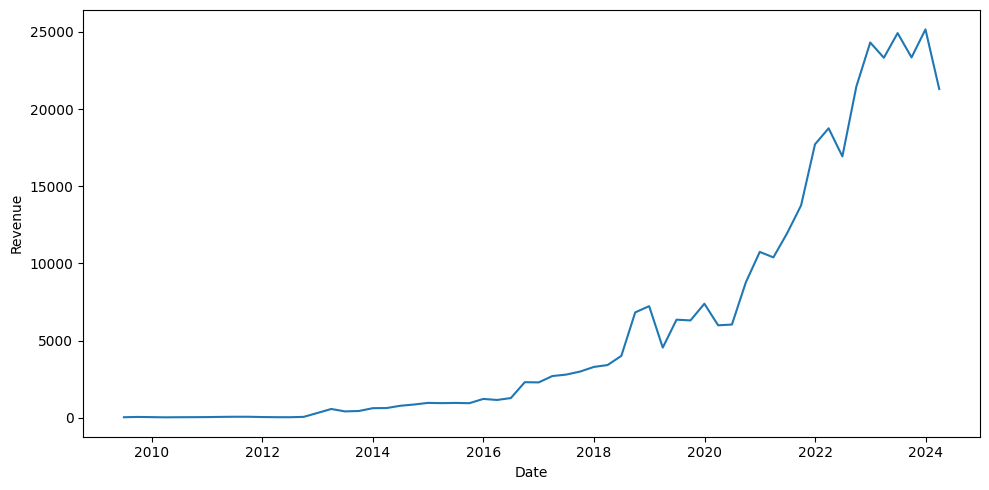

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


#Limpiar los valores no válidos
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"].str.replace(',', '').str.isnumeric()]

#Convertir la columna "Revenue" a enteros
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(',', '').astype(int)

#Convertir la columna "Date" a formato datetime
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])

#Crear la gráfica
fig, axis = plt.subplots(figsize=(10, 5))
sns.lineplot(data=tesla_revenue, x="Date", y="Revenue", ax=axis)

plt.tight_layout()
plt.show()


En esta gráfica podemos observar que desde 2009 hasta el primer trimestre del presente año, el precio de Tesla ha ido en un aumento constante con picos de subidas y bajadas, claramente, pero aún así el valor de la empresa ha ido "in crescendo"

BENEFICIO BRUTO ANUAL

/tmp/ipykernel_434/1329723247.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tesla_revenue_yearly, x="Date", y="Revenue", palette="viridis")


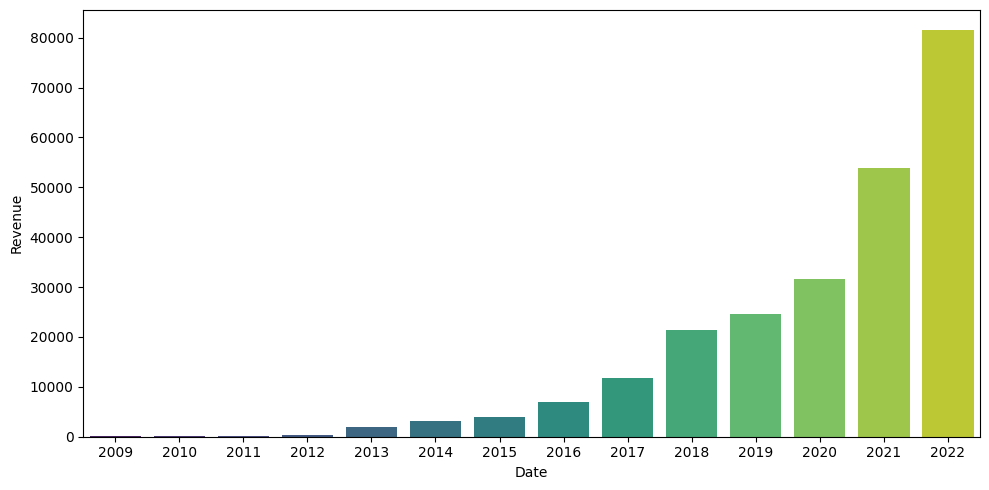

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la figura y el eje
fig, axis = plt.subplots(figsize=(10, 5))

# Convertir la columna de fecha a tipo datetime si no lo está ya
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])

# Agrupar por año y sumar los ingresos
tesla_revenue_yearly = tesla_revenue.groupby(tesla_revenue["Date"].dt.year)["Revenue"].sum().reset_index()

# Filtrar los datos para años menores que 2023 si es necesario
tesla_revenue_yearly = tesla_revenue_yearly[tesla_revenue_yearly["Date"] < 2023]

# Crear el gráfico de barras con paleta de colores
sns.barplot(data=tesla_revenue_yearly, x="Date", y="Revenue", palette="viridis")

plt.tight_layout()

plt.show()



En esta gráfica al ser una gráfica anual se puede ver el crecimiento de manera mucho más unifore que en la gráfica anterior.

BENEFICIO BRUTO MENSUAL

/tmp/ipykernel_434/1527412792.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tesla_revenue_quarterly, x="Quarter", y="Revenue", palette=palette)


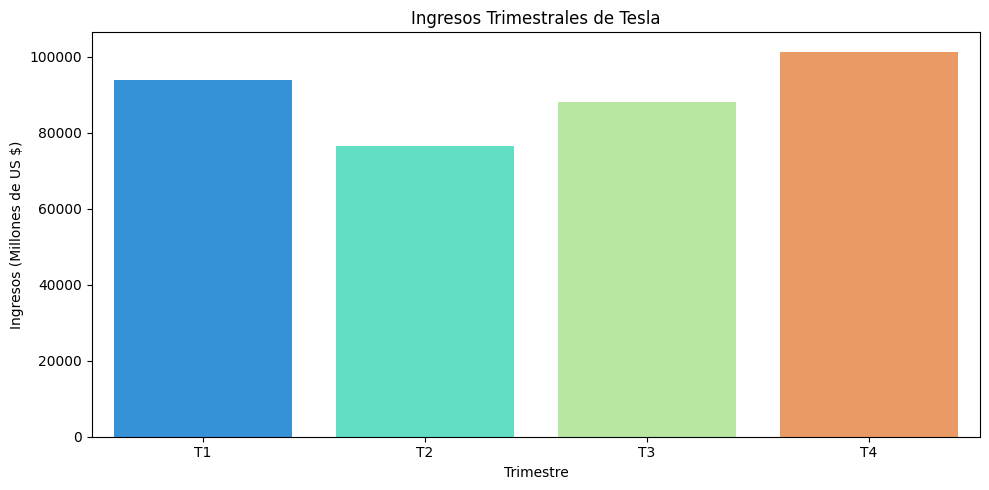

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la figura y el eje
fig, axis = plt.subplots(figsize=(10, 5))

# Convertir la columna de fecha a tipo datetime si no lo está ya
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])

# Extraer el trimestre de la fecha y agrupar por trimestre, sumando los ingresos
tesla_revenue["Quarter"] = tesla_revenue["Date"].dt.quarter
tesla_revenue_quarterly = tesla_revenue.groupby("Quarter")["Revenue"].sum().reset_index()

# Definir un esquema de colores para los trimestres
palette = sns.color_palette("rainbow", 4)  

# Crear el gráfico de barras trimestral con colores diferentes
sns.barplot(data=tesla_revenue_quarterly, x="Quarter", y="Revenue", palette=palette)

# Etiquetas de los trimestres en el eje x
plt.xticks(ticks=[0, 1, 2, 3], labels=["T1", "T2", "T3", "T4"])

# Añadir título y etiquetas de ejes
plt.title('Ingresos Trimestrales de Tesla')
plt.xlabel('Trimestre')
plt.ylabel('Ingresos (Millones de US $)')


plt.tight_layout()
plt.show()



Podemos observar lo siguiente:
- La gráfica muestra que el primer y el último trimestre es donde hay mayores ingresos, siendo el final del año donde hay más ingresos que en los trimestres anteriores.
- El segundo trimestre es donde menos ingresos se generan. 
-Según una breve busqueda en Google, se puede observar que la mayoría de autos Tesla son lanzados en el segundo trimestre del año, pero no es hasta entrados el tercer trimestre que empiezan a ser recibidos, esto puede influir en los ingresos de la empresa, la gente esperaría hasta el tercer trimestre para poder comprar autos, lo cual indica una bajada de ingresos en el segundo trimestre y una subida en este.
